#### Let us import all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Understanding and visualisation
#### Let's read the dataset and check the columns to see if they have any null values

In [3]:
dataframe = pd.read_csv("day.csv",index_col="instant")
dataframe.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataframe.shape

(730, 15)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


#### There are 730 rows and 16 columns in the dataset and neither of them are having any null values so we don't need to drop any columns

#### Based on the data dictionary we know the columns casual, registered and cnt shows total casual rentals, registered rentals and total rentals (which is summation of casual and registered).
#### Hence the column casual and registered can be dropped from analysis.
#### We can drop the column dteday also as it is merely a date of rental, hence insignificant to analysis

In [6]:
dataframe.drop(columns=["casual","registered","dteday"],inplace=True)
dataframe.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Let's map the categorical variables season, weekday, yr, weathersit & mnth based on the information we have in data dictionary

In [7]:
seasonsmap = {'1':'spring','2':'summer','3':'fall','4':'winter'}
yrmap = {'0':'2018','1':'2019'}
weathermap = {"1":"Clear","2":"Mist","3":"Light Snow","4":"Heavy Rain"}
mnthmap = {'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}
weekdaysmap = {'0':'Sunday','1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday'}

In [8]:
dataframe["season"] = dataframe["season"].astype(str)
dataframe["season"] = dataframe["season"].map(seasonsmap)
dataframe["yr"] = dataframe["yr"].astype(str)
dataframe["yr"] = dataframe["yr"].map(yrmap)
dataframe["weathersit"] = dataframe["weathersit"].astype(str)
dataframe["weathersit"] = dataframe["weathersit"].map(weathermap)
dataframe["mnth"] = dataframe["mnth"].astype(str)
dataframe["mnth"] = dataframe["mnth"].map(mnthmap)
dataframe["weekday"] = dataframe["weekday"].astype(str)
dataframe["weekday"] = dataframe["weekday"].map(weekdaysmap)

dataframe.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,spring,2018,Jan,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,spring,2018,Jan,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,spring,2018,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Let's visualize the data by plotting scatter plot

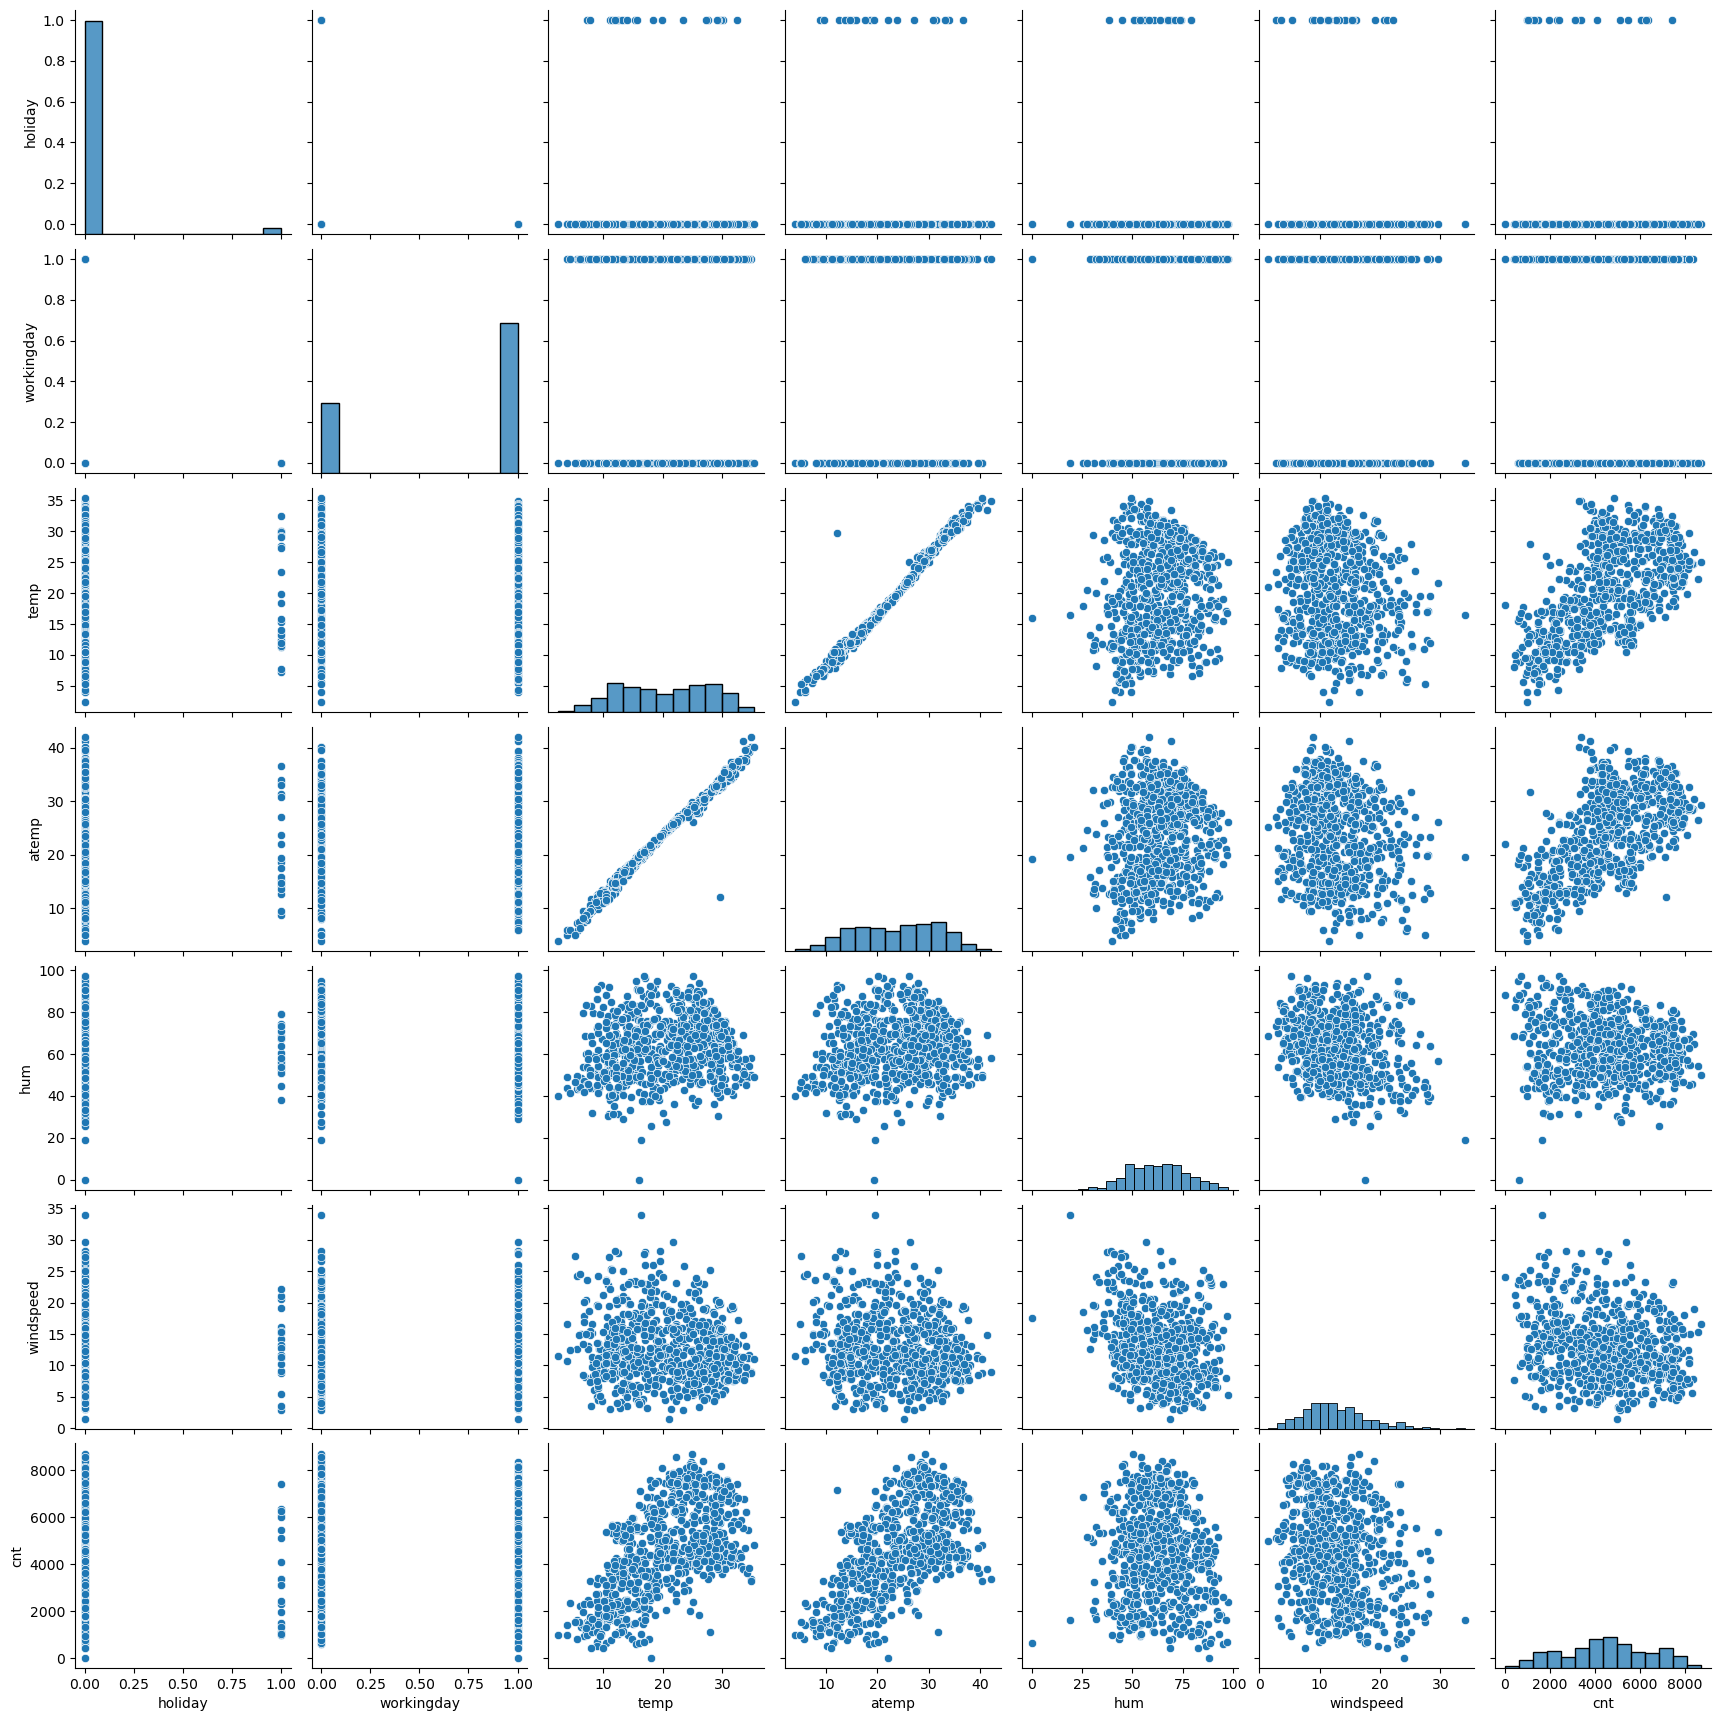

In [9]:
sns.pairplot(dataframe)
plt.show()

#### Few things we can see clearly from scatter plot is columns like temp, atemp, windspeed show some linear regression with the target variable cnt

#### Let's plot a box plot for categorical variables against target variable cnt

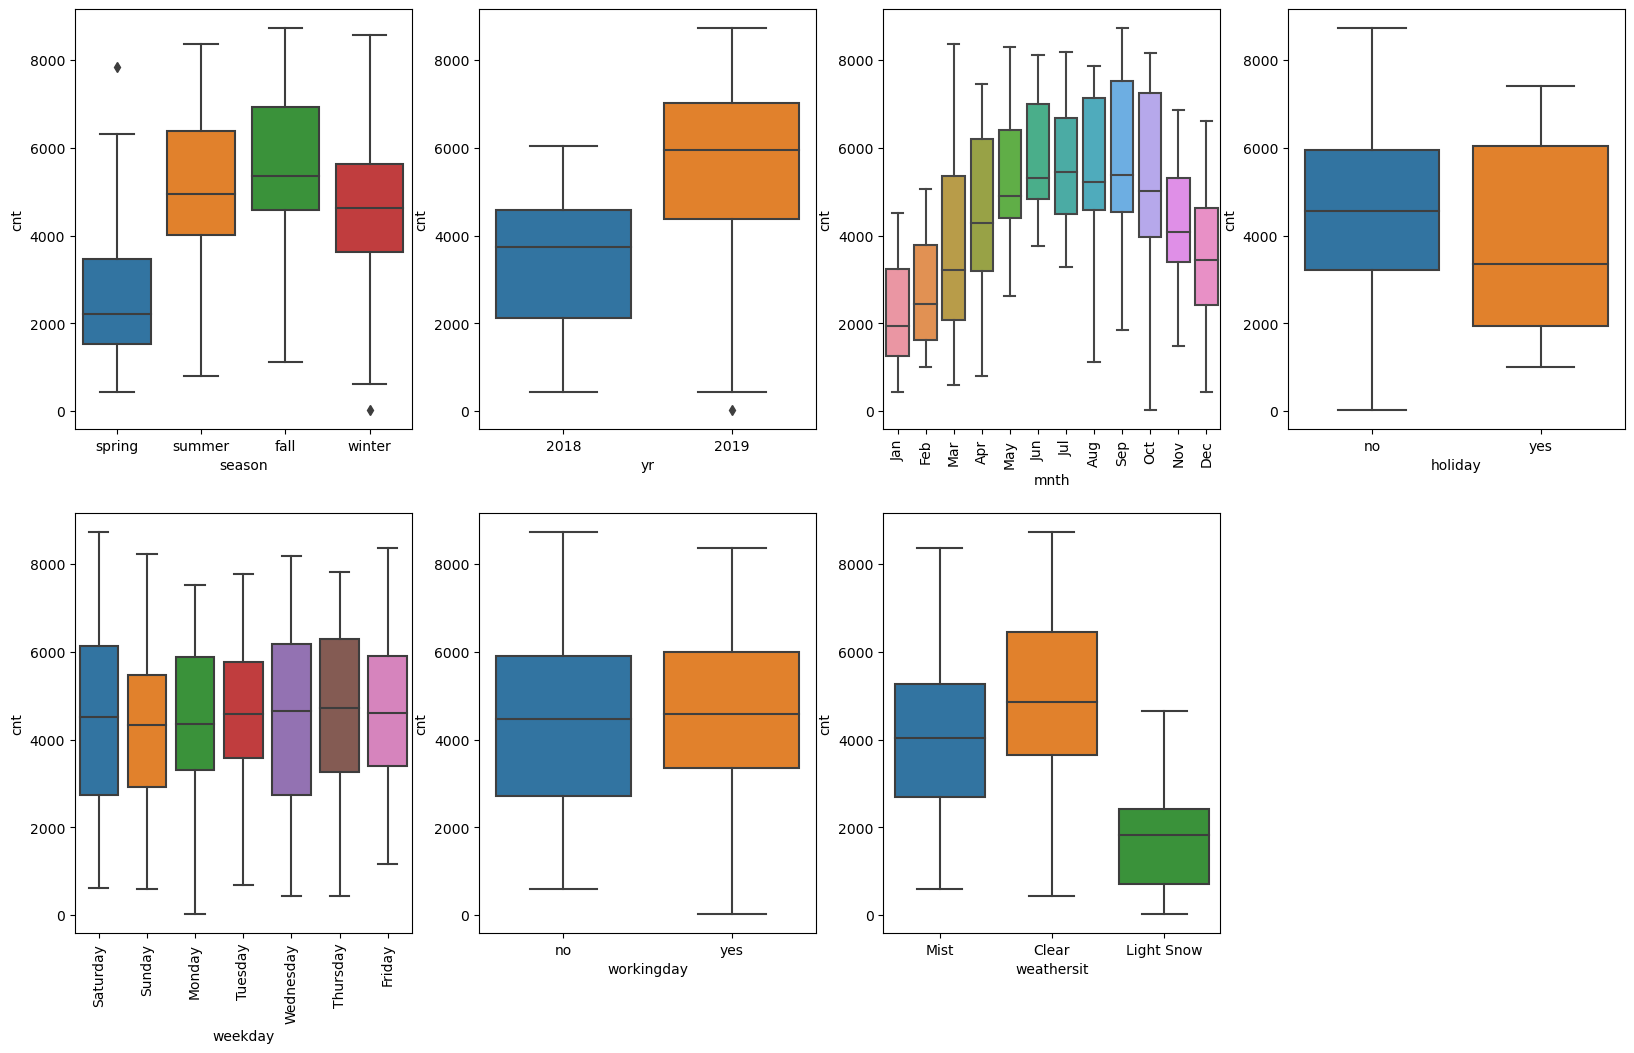

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt",data=dataframe)
plt.subplot(2,4,2)
sns.boxplot(x="yr",y="cnt",data=dataframe)
plt.subplot(2,4,3)
ax1 = sns.boxplot(x="mnth",y="cnt",data=dataframe)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.subplot(2,4,4)
ax2 = sns.boxplot(x="holiday",y="cnt",data=dataframe)
ax2.set_xticklabels(["no","yes"])
plt.subplot(2,4,5)
ax3 = sns.boxplot(x="weekday",y="cnt",data=dataframe)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
plt.subplot(2,4,6)
ax4 = sns.boxplot(x="workingday",y="cnt",data=dataframe)
ax4.set_xticklabels(["no","yes"])
plt.subplot(2,4,7)
sns.boxplot(x="weathersit",y="cnt",data=dataframe)
plt.show()

### Observations from box plot above

1. Rentals of bikes went up in year 2019
2. The total number rentals on bikes is higher in Fall, Summer and Winter season than Spring probably because of people being on vacation in spring season
3. People tend to rent bikes more between June to November month (explained by Fall and Winter Season)
4. Number of rentals is very low in Light Snow compared compared to Misty and Clear weather
5. More people have rented bikes during holidays
6. Working day plays not much significant role in renting of the bikes
7. There is no significant relationship between the day of the week with number of rentals of a bike

## Data Preparation

#### Let us remove the columns which do not bring any value from business point of view.

1. We know from the boxplot above that there is no variation in terms of number of rentals of bike in any particular day of the week so we might as well remove that column from our further analysis
2. Simillarly working day does not seem to be playing any role on rentals of bike, so we can remove that columns as well.

In [11]:
dataframe = dataframe.drop(columns=["weekday","workingday"])
dataframe.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,
1,spring,2018,Jan,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,spring,2018,Jan,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,spring,2018,Jan,0,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,spring,2018,Jan,0,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,spring,2018,Jan,0,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Lets create dummy variables for all the categorical variables.

##### We already know that season, yr, mnth, weathersit are all the categorical variables

In [12]:
season_dummy_df = pd.get_dummies(dataframe["season"],drop_first=True,dtype=int)
yr_dummy_df = pd.get_dummies(dataframe["yr"],drop_first=True,dtype=int)
mnth_dummy_df = pd.get_dummies(dataframe["mnth"],drop_first=True,dtype=int)
weathersit_dummy_df = pd.get_dummies(dataframe["weathersit"],drop_first=True,dtype=int)

dataframe = pd.concat([dataframe,season_dummy_df,yr_dummy_df,mnth_dummy_df,weathersit_dummy_df], axis=1)
dataframe.head()

,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,2018,Jan,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,1,0,0,0,0,0,0,0,0,1
2,spring,2018,Jan,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,1,0,0,0,0,0,0,0,0,1
3,spring,2018,Jan,0,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,1,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,0,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,1,0,0,0,0,0,0,0,0,0
5,spring,2018,Jan,0,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,1,0,0,0,0,0,0,0,0,0


### Now we have dummy variables for categorical variables, let us remove categorical variables from dataset to get a complete numeric data

In [13]:
dataframe.drop(columns=["season","yr","mnth","weathersit"], inplace=True)
dataframe.head()

,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Data splitting and scaling

#### Let us split the dataframe into train and test 70-30 ratio

In [14]:
df_train, df_test = train_test_split(dataframe, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 23)
(220, 23)


#### Let's work on Scaling the data before building the model

In [15]:
scaler = MinMaxScaler()

#### Declaring the numeric variables that needs to be scaled. Here we will be taking into consideration only the numeric variables and not dummy variables.

In [16]:
numeric_columns_to_scale = ["temp","atemp","hum","windspeed","cnt"]
df_train[numeric_columns_to_scale] = scaler.fit_transform(df_train[numeric_columns_to_scale])
df_train.head()

,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
577,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
427,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
729,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
483,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
112,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Building Model

### Now all the variables are on the same scale, let us build model with all the parameters and remove them based on their significance (p value) & multicolinearity (VIF)


#### Let us create y_train & X_train where y_train has cnt variable which is a target variable and X_train is all other variables together

In [17]:
y_train = df_train.pop("cnt")
X_train = df_train

In [18]:
y_train.head()

instant
577    0.827658
427    0.465255
729    0.204096
483    0.482973
112    0.191095
Name: cnt, dtype: float64

In [19]:
X_train.head()

,holiday,temp,atemp,hum,windspeed,spring,summer,winter,2019,Aug,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
577,0,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
427,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
729,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
483,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
112,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
X_train_sm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.11e-182
Time:                        19:05:29   Log-Likelihood:                 516.80
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     487   BIC:                            -890.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3260      0.044      7.435      0.000       0.240       0.412
holiday       -0.0870      0.026     -3.359      0.001      -0.138      -0.036
temp           0.4201      0.143      2.932      0.004       0.139       0.702
atemp          0.0356      0.139      0.255      0.798      -0.238       0.310
hum           -0.1686      0.039     -4.334      0.000      -0.245      -0.092
windspeed     -0.1862      0.027     -6.975      0.000      -0.239      -0.134
spring        -0.0448      0.030     -1.477      0.140      -0.105       0.015
summer         0.0442      0.027      1.664      0.097      -0.008       0.096
winter         0.1069      0.028      3.773      0.000       0.051       0.163
2019           0.2313      0.008     28.324      0.000       0.215       0.247
Aug            0.0248      0.034      0.724      0.469      -0.043       0.092
Dec           -0.0382      0.034     -1.122      0.262      -0.105       0.029
Feb           -0.0306      0.033     -0.916      0.360      -0.096       0.035
Jan           -0.0577      0.034     -1.695      0.091      -0.125       0.009
Jul           -0.0348      0.035     -0.981      0.327      -0.105       0.035
Jun            0.0048      0.025      0.189      0.850      -0.045       0.054
Mar            0.0061      0.025      0.244      0.807      -0.043       0.055
May            0.0260      0.021      1.210      0.227      -0.016       0.068
Nov           -0.0369      0.037     -1.001      0.317      -0.109       0.035
Oct            0.0077      0.036      0.213      0.832      -0.064       0.079
Sep            0.0906      0.032      2.797      0.005       0.027       0.154
Light Snow    -0.2448      0.027     -9.188      0.000      -0.297      -0.192
Mist          -0.0547      0.011     -5.203      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       73.283   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.496
Skew:                          -0.725   Prob(JB):                     1.17e-41
Kurtosis:                       5.602   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let us calculate VIF of all parameters

In [21]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,430.32
2,atemp,378.62
3,hum,37.20
5,spring,11.62
7,winter,11.59
6,summer,6.66
18,Oct,6.24
17,Nov,6.00
9,Aug,5.84
4,windspeed,5.30


##### We see column temp is having high VIF value but it's p value is close to zero. The next column with high VIF is atemp and it's p value is also significantly high

In [22]:
X_train_2 = X_train.drop(columns="atemp")
X_train_sm = sm.add_constant(X_train_2)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.80e-183
Time:                        19:05:29   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     488   BIC:                            -896.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3261      0.044      7.444      0.000       0.240       0.412
holiday       -0.0873      0.026     -3.381      0.001      -0.138      -0.037
temp           0.4547      0.047      9.727      0.000       0.363       0.547
hum           -0.1683      0.039     -4.332      0.000      -0.245      -0.092
windspeed     -0.1877      0.026     -7.198      0.000      -0.239      -0.136
spring        -0.0445      0.030     -1.469      0.142      -0.104       0.015
summer         0.0445      0.026      1.683      0.093      -0.007       0.097
winter         0.1072      0.028      3.792      0.000       0.052       0.163
2019           0.2313      0.008     28.353      0.000       0.215       0.247
Aug            0.0237      0.034      0.698      0.486      -0.043       0.090
Dec           -0.0382      0.034     -1.123      0.262      -0.105       0.029
Feb           -0.0307      0.033     -0.919      0.358      -0.096       0.035
Jan           -0.0578      0.034     -1.701      0.090      -0.125       0.009
Jul           -0.0355      0.035     -1.006      0.315      -0.105       0.034
Jun            0.0039      0.025      0.157      0.875      -0.045       0.053
Mar            0.0059      0.025      0.238      0.812      -0.043       0.055
May            0.0254      0.021      1.192      0.234      -0.016       0.067
Nov           -0.0369      0.037     -1.003      0.316      -0.109       0.035
Oct            0.0076      0.036      0.210      0.834      -0.064       0.079
Sep            0.0901      0.032      2.789      0.005       0.027       0.154
Light Snow    -0.2453      0.027     -9.242      0.000      -0.297      -0.193
Mist          -0.0547      0.010     -5.213      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       72.793   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.803
Skew:                          -0.721   Prob(JB):                     2.73e-41
Kurtosis:                       5.591   Cond. No.                         34.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,37.12
1,temp,36.19
4,spring,11.59
6,winter,11.56
5,summer,6.62
17,Oct,6.24
16,Nov,6.00
8,Aug,5.73
11,Jan,5.13
12,Jul,5.13


#### The next column with high VIF is spring and it's p value is also higher than expected p value which is 0.02

In [24]:
X_train_3 = X_train_2.drop(columns="spring")
X_train_sm = sm.add_constant(X_train_3)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          6.94e-184
Time:                        19:05:29   Log-Likelihood:                 515.64
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     489   BIC:                            -900.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2988      0.040      7.522      0.000       0.221       0.377
holiday       -0.0878      0.026     -3.394      0.001      -0.139      -0.037
temp           0.4637      0.046      9.991      0.000       0.372       0.555
hum           -0.1704      0.039     -4.385      0.000      -0.247      -0.094
windspeed     -0.1908      0.026     -7.334      0.000      -0.242      -0.140
summer         0.0699      0.020      3.484      0.001       0.030       0.109
winter         0.1321      0.023      5.835      0.000       0.088       0.177
2019           0.2310      0.008     28.292      0.000       0.215       0.247
Aug            0.0460      0.030      1.514      0.131      -0.014       0.106
Dec           -0.0425      0.034     -1.253      0.211      -0.109       0.024
Feb           -0.0481      0.031     -1.538      0.125      -0.109       0.013
Jan           -0.0747      0.032     -2.332      0.020      -0.138      -0.012
Jul           -0.0138      0.032     -0.428      0.668      -0.077       0.049
Jun            0.0103      0.025      0.418      0.676      -0.038       0.059
Mar           -0.0057      0.024     -0.244      0.808      -0.052       0.041
May            0.0239      0.021      1.120      0.263      -0.018       0.066
Nov           -0.0357      0.037     -0.970      0.332      -0.108       0.037
Oct            0.0075      0.036      0.207      0.836      -0.064       0.079
Sep            0.1079      0.030      3.597      0.000       0.049       0.167
Light Snow    -0.2427      0.027     -9.155      0.000      -0.295      -0.191
Mist          -0.0543      0.011     -5.166      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.865   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.605
Skew:                          -0.710   Prob(JB):                     2.71e-39
Kurtosis:                       5.518   Cond. No.                         33.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,35.89
2,hum,35.32
5,winter,7.99
16,Oct,6.05
15,Nov,5.76
7,Aug,5.12
3,windspeed,4.70
11,Jul,4.65
4,summer,4.63
8,Dec,4.25


##### Next column we see with high VIF is Oct whose p value is also higher than acceptable range

In [26]:
X_train_4 = X_train_3.drop(columns="Oct")
X_train_sm = sm.add_constant(X_train_4)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.88e-185
Time:                        19:05:29   Log-Likelihood:                 515.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     490   BIC:                            -906.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3019      0.037      8.212      0.000       0.230       0.374
holiday       -0.0875      0.026     -3.391      0.001      -0.138      -0.037
temp           0.4633      0.046     10.000      0.000       0.372       0.554
hum           -0.1694      0.039     -4.396      0.000      -0.245      -0.094
windspeed     -0.1908      0.026     -7.339      0.000      -0.242      -0.140
summer         0.0676      0.017      4.057      0.000       0.035       0.100
winter         0.1350      0.018      7.534      0.000       0.100       0.170
2019           0.2309      0.008     28.337      0.000       0.215       0.247
Aug            0.0426      0.025      1.672      0.095      -0.007       0.093
Dec           -0.0481      0.020     -2.356      0.019      -0.088      -0.008
Feb           -0.0516      0.026     -1.977      0.049      -0.103      -0.000
Jan           -0.0783      0.027     -2.908      0.004      -0.131      -0.025
Jul           -0.0171      0.028     -0.620      0.536      -0.071       0.037
Jun            0.0084      0.023      0.368      0.713      -0.037       0.053
Mar           -0.0084      0.020     -0.427      0.670      -0.047       0.030
May            0.0227      0.020      1.107      0.269      -0.018       0.063
Nov           -0.0422      0.020     -2.149      0.032      -0.081      -0.004
Sep            0.1038      0.022      4.664      0.000       0.060       0.147
Light Snow    -0.2426      0.026     -9.162      0.000      -0.295      -0.191
Mist          -0.0543      0.010     -5.178      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.180   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.438
Skew:                          -0.704   Prob(JB):                     8.02e-39
Kurtosis:                       5.504   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,34.80
2,hum,31.61
3,windspeed,4.54
5,winter,4.41
7,Aug,3.90
11,Jul,3.67
4,summer,3.66
12,Jun,2.54
16,Sep,2.45
10,Jan,2.41


##### Now all the columns wigh high VIF values such as temp and hum are having zero p value, hence we will not be removing them. 
##### Let us now remove the columns based on their p value. We see column Jun with high p value (higher than 0.02), let us remove that column from model

In [28]:
X_train_5 = X_train_4.drop(columns="Jun")
X_train_sm = sm.add_constant(X_train_5)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.07e-186
Time:                        19:05:30   Log-Likelihood:                 515.55
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     491   BIC:                            -912.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3019      0.037      8.220      0.000       0.230       0.374
holiday       -0.0883      0.026     -3.437      0.001      -0.139      -0.038
temp           0.4723      0.039     11.989      0.000       0.395       0.550
hum           -0.1714      0.038     -4.497      0.000      -0.246      -0.097
windspeed     -0.1920      0.026     -7.461      0.000      -0.243      -0.141
summer         0.0674      0.017      4.049      0.000       0.035       0.100
winter         0.1329      0.017      7.823      0.000       0.100       0.166
2019           0.2306      0.008     28.445      0.000       0.215       0.247
Aug            0.0371      0.021      1.797      0.073      -0.003       0.078
Dec           -0.0479      0.020     -2.350      0.019      -0.088      -0.008
Feb           -0.0524      0.026     -2.019      0.044      -0.103      -0.001
Jan           -0.0785      0.027     -2.920      0.004      -0.131      -0.026
Jul           -0.0232      0.022     -1.044      0.297      -0.067       0.020
Mar           -0.0103      0.019     -0.542      0.588      -0.048       0.027
May            0.0189      0.018      1.067      0.286      -0.016       0.054
Nov           -0.0418      0.020     -2.136      0.033      -0.080      -0.003
Sep            0.0998      0.019      5.132      0.000       0.062       0.138
Light Snow    -0.2424      0.026     -9.164      0.000      -0.294      -0.190
Mist          -0.0541      0.010     -5.170      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       69.579   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.905
Skew:                          -0.703   Prob(JB):                     4.69e-38
Kurtosis:                       5.473   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.79
1,temp,22.03
3,windspeed,4.44
5,winter,3.92
4,summer,3.66
7,Aug,2.55
10,Jan,2.41
11,Jul,2.36
17,Mist,2.29
6,2019,2.10


##### Next column we see with p value is Mar

In [30]:
X_train_6 = X_train_5.drop(columns="Mar")
X_train_sm = sm.add_constant(X_train_6)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          4.58e-187
Time:                        19:05:30   Log-Likelihood:                 515.40
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     492   BIC:                            -918.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2919      0.032      9.197      0.000       0.230       0.354
holiday       -0.0879      0.026     -3.425      0.001      -0.138      -0.037
temp           0.4820      0.035     13.750      0.000       0.413       0.551
hum           -0.1729      0.038     -4.551      0.000      -0.248      -0.098
windspeed     -0.1920      0.026     -7.466      0.000      -0.243      -0.141
summer         0.0707      0.015      4.588      0.000       0.040       0.101
winter         0.1373      0.015      9.206      0.000       0.108       0.167
2019           0.2304      0.008     28.482      0.000       0.214       0.246
Aug            0.0404      0.020      2.047      0.041       0.002       0.079
Dec           -0.0432      0.018     -2.345      0.019      -0.079      -0.007
Feb           -0.0443      0.021     -2.088      0.037      -0.086      -0.003
Jan           -0.0696      0.021     -3.270      0.001      -0.111      -0.028
Jul           -0.0205      0.022     -0.949      0.343      -0.063       0.022
May            0.0203      0.017      1.161      0.246      -0.014       0.055
Nov           -0.0391      0.019     -2.067      0.039      -0.076      -0.002
Sep            0.1032      0.018      5.607      0.000       0.067       0.139
Light Snow    -0.2418      0.026     -9.156      0.000      -0.294      -0.190
Mist          -0.0539      0.010     -5.162      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       68.113   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.915
Skew:                          -0.699   Prob(JB):                     4.20e-36
Kurtosis:                       5.390   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,25.12
1,temp,20.86
3,windspeed,4.07
4,summer,3.48
5,winter,3.39
7,Aug,2.37
11,Jul,2.27
16,Mist,2.25
6,2019,2.08
10,Jan,1.95


##### Next column we see with high p value is Jul

In [32]:
X_train_7 = X_train_6.drop(columns="Jul")
X_train_sm = sm.add_constant(X_train_7)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          5.43e-188
Time:                        19:05:30   Log-Likelihood:                 514.93
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     493   BIC:                            -923.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2924      0.032      9.215      0.000       0.230       0.355
holiday       -0.0869      0.026     -3.389      0.001      -0.137      -0.037
temp           0.4656      0.030     15.269      0.000       0.406       0.525
hum           -0.1703      0.038     -4.495      0.000      -0.245      -0.096
windspeed     -0.1903      0.026     -7.418      0.000      -0.241      -0.140
summer         0.0771      0.014      5.544      0.000       0.050       0.104
winter         0.1415      0.014      9.943      0.000       0.114       0.169
2019           0.2307      0.008     28.554      0.000       0.215       0.247
Aug            0.0509      0.016      3.112      0.002       0.019       0.083
Dec           -0.0434      0.018     -2.355      0.019      -0.080      -0.007
Feb           -0.0424      0.021     -2.005      0.046      -0.084      -0.001
Jan           -0.0688      0.021     -3.233      0.001      -0.111      -0.027
May            0.0219      0.017      1.256      0.210      -0.012       0.056
Nov           -0.0396      0.019     -2.098      0.036      -0.077      -0.003
Sep            0.1109      0.017      6.712      0.000       0.078       0.143
Light Snow    -0.2428      0.026     -9.203      0.000      -0.295      -0.191
Mist          -0.0544      0.010     -5.216      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.865   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.272
Skew:                          -0.718   Prob(JB):                     2.37e-38
Kurtosis:                       5.468   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,24.84
1,temp,14.61
3,windspeed,4.04
5,winter,3.08
4,summer,2.77
15,Mist,2.24
6,2019,2.07
10,Jan,1.95
12,Nov,1.87
8,Dec,1.65


##### Next column we see with high p value is May

In [34]:
X_train_8 = X_train_7.drop(columns="May")
X_train_sm = sm.add_constant(X_train_8)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          8.72e-189
Time:                        19:05:30   Log-Likelihood:                 514.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     494   BIC:                            -928.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2858      0.031      9.127      0.000       0.224       0.347
holiday       -0.0875      0.026     -3.413      0.001      -0.138      -0.037
temp           0.4704      0.030     15.541      0.000       0.411       0.530
hum           -0.1635      0.038     -4.358      0.000      -0.237      -0.090
windspeed     -0.1915      0.026     -7.466      0.000      -0.242      -0.141
summer         0.0847      0.013      6.772      0.000       0.060       0.109
winter         0.1415      0.014      9.934      0.000       0.113       0.169
2019           0.2302      0.008     28.510      0.000       0.214       0.246
Aug            0.0497      0.016      3.043      0.002       0.018       0.082
Dec           -0.0423      0.018     -2.296      0.022      -0.078      -0.006
Feb           -0.0402      0.021     -1.908      0.057      -0.082       0.001
Jan           -0.0667      0.021     -3.141      0.002      -0.108      -0.025
Nov           -0.0385      0.019     -2.039      0.042      -0.076      -0.001
Sep            0.1100      0.017      6.660      0.000       0.078       0.142
Light Snow    -0.2450      0.026     -9.302      0.000      -0.297      -0.193
Mist          -0.0547      0.010     -5.240      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       69.610   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.467
Skew:                          -0.722   Prob(JB):                     5.26e-36
Kurtosis:                       5.358   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,24.77
1,temp,14.58
3,windspeed,3.96
5,winter,3.07
4,summer,2.30
14,Mist,2.24
6,2019,2.06
10,Jan,1.95
11,Nov,1.87
8,Dec,1.65


##### Next column we see with high p value is Feb

In [36]:
X_train_9 = X_train_8.drop(columns="Feb")
X_train_sm = sm.add_constant(X_train_9)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.76e-189
Time:                        19:05:30   Log-Likelihood:                 512.24
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     495   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2615      0.029      9.118      0.000       0.205       0.318
holiday       -0.0908      0.026     -3.538      0.000      -0.141      -0.040
temp           0.5000      0.026     19.197      0.000       0.449       0.551
hum           -0.1683      0.038     -4.484      0.000      -0.242      -0.095
windspeed     -0.1914      0.026     -7.443      0.000      -0.242      -0.141
summer         0.0948      0.011      8.339      0.000       0.072       0.117
winter         0.1503      0.014     11.130      0.000       0.124       0.177
2019           0.2295      0.008     28.377      0.000       0.214       0.245
Aug            0.0535      0.016      3.294      0.001       0.022       0.085
Dec           -0.0307      0.017     -1.762      0.079      -0.065       0.004
Jan           -0.0456      0.018     -2.509      0.012      -0.081      -0.010
Nov           -0.0313      0.019     -1.687      0.092      -0.068       0.005
Sep            0.1153      0.016      7.066      0.000       0.083       0.147
Light Snow    -0.2421      0.026     -9.182      0.000      -0.294      -0.190
Mist          -0.0540      0.010     -5.164      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       63.106   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.669
Skew:                          -0.667   Prob(JB):                     6.35e-32
Kurtosis:                       5.232   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,20.02
1,temp,12.38
3,windspeed,3.66
5,winter,2.83
13,Mist,2.19
6,2019,2.04
4,summer,1.99
10,Nov,1.84
9,Jan,1.62
7,Aug,1.60


##### Next column we see with high p value is Dec

In [38]:
X_train_10 = X_train_9.drop(columns="Dec")
X_train_sm = sm.add_constant(X_train_10)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.20e-189
Time:                        19:05:30   Log-Likelihood:                 510.65
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     496   BIC:                            -934.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2518      0.028      8.927      0.000       0.196       0.307
holiday       -0.0913      0.026     -3.550      0.000      -0.142      -0.041
temp           0.5148      0.025     20.837      0.000       0.466       0.563
hum           -0.1738      0.037     -4.636      0.000      -0.247      -0.100
windspeed     -0.1882      0.026     -7.320      0.000      -0.239      -0.138
summer         0.0978      0.011      8.682      0.000       0.076       0.120
winter         0.1437      0.013     11.051      0.000       0.118       0.169
2019           0.2294      0.008     28.306      0.000       0.214       0.245
Aug            0.0538      0.016      3.305      0.001       0.022       0.086
Jan           -0.0371      0.018     -2.113      0.035      -0.072      -0.003
Nov           -0.0188      0.017     -1.094      0.274      -0.053       0.015
Sep            0.1187      0.016      7.312      0.000       0.087       0.151
Light Snow    -0.2373      0.026     -9.029      0.000      -0.289      -0.186
Mist          -0.0529      0.010     -5.057      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.905   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.203
Skew:                          -0.635   Prob(JB):                     5.33e-29
Kurtosis:                       5.125   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,18.08
1,temp,11.45
3,windspeed,3.65
5,winter,2.59
12,Mist,2.15
6,2019,2.04
4,summer,1.96
7,Aug,1.60
9,Nov,1.59
8,Jan,1.55


##### Next column we see with high p value is Nov

In [40]:
X_train_11 = X_train_10.drop(columns="Nov")
X_train_sm = sm.add_constant(X_train_11)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          1.44e-190
Time:                        19:05:30   Log-Likelihood:                 510.03
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     497   BIC:                            -939.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2497      0.028      8.871      0.000       0.194       0.305
holiday       -0.0946      0.026     -3.703      0.000      -0.145      -0.044
temp           0.5164      0.025     20.935      0.000       0.468       0.565
hum           -0.1718      0.037     -4.587      0.000      -0.245      -0.098
windspeed     -0.1889      0.026     -7.351      0.000      -0.239      -0.138
summer         0.0979      0.011      8.691      0.000       0.076       0.120
winter         0.1374      0.012     11.805      0.000       0.115       0.160
2019           0.2295      0.008     28.304      0.000       0.214       0.245
Aug            0.0535      0.016      3.282      0.001       0.021       0.085
Jan           -0.0362      0.018     -2.064      0.040      -0.071      -0.002
Sep            0.1199      0.016      7.403      0.000       0.088       0.152
Light Snow    -0.2367      0.026     -9.007      0.000      -0.288      -0.185
Mist          -0.0529      0.010     -5.054      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.708   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.010
Skew:                          -0.624   Prob(JB):                     2.63e-28
Kurtosis:                       5.102   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_11.values, i) for i in range(X_train_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,18.08
1,temp,11.43
3,windspeed,3.62
11,Mist,2.15
5,winter,2.04
6,2019,2.04
4,summer,1.96
7,Aug,1.60
8,Jan,1.55
9,Sep,1.32


##### Next column we see with high p value is Jan

In [42]:
X_train_12 = X_train_11.drop(columns="Jan")
X_train_sm = sm.add_constant(X_train_12)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.50e-191
Time:                        19:05:30   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2322      0.027      8.623      0.000       0.179       0.285
holiday       -0.0953      0.026     -3.720      0.000      -0.146      -0.045
temp           0.5397      0.022     24.504      0.000       0.496       0.583
hum           -0.1776      0.037     -4.740      0.000      -0.251      -0.104
windspeed     -0.1838      0.026     -7.161      0.000      -0.234      -0.133
summer         0.1041      0.011      9.561      0.000       0.083       0.126
winter         0.1471      0.011     13.797      0.000       0.126       0.168
2019           0.2286      0.008     28.142      0.000       0.213       0.245
Aug            0.0553      0.016      3.392      0.001       0.023       0.087
Sep            0.1224      0.016      7.550      0.000       0.091       0.154
Light Snow    -0.2338      0.026     -8.879      0.000      -0.285      -0.182
Mist          -0.0528      0.010     -5.031      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       56.297   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.844
Skew:                          -0.610   Prob(JB):                     1.28e-27
Kurtosis:                       5.083   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_12.columns
vif['VIF'] = [variance_inflation_factor(X_train_12.values, i) for i in range(X_train_12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,hum,14.31
1,temp,9.66
3,windspeed,3.59
10,Mist,2.13
6,2019,2.01
4,summer,1.83
5,winter,1.75
7,Aug,1.59
8,Sep,1.31
9,Light Snow,1.16


### We already know from the box plot before that the rentals of bike is quiet low in Light Snow & Misty weather. Also the parameters of model shows negative coefficient for these two columns.
#### From business point of view as well, these two variables who aleady have negative coefficients can not be acted upon. Hence lets remove these two from model and rebuild the r2 score

In [44]:
X_train_13 = X_train_12.drop(columns="Light Snow")
X_train_sm = sm.add_constant(X_train_13)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          3.35e-176
Time:                        19:05:30   Log-Likelihood:                 470.38
No. Observations:                 510   AIC:                            -918.8
Df Residuals:                     499   BIC:                            -872.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.028     10.962      0.000       0.249       0.357
holiday       -0.0846      0.028     -3.073      0.002      -0.139      -0.031
temp           0.5560      0.024     23.564      0.000       0.510       0.602
hum           -0.3058      0.037     -8.227      0.000      -0.379      -0.233
windspeed     -0.2282      0.027     -8.434      0.000      -0.281      -0.175
summer         0.1066      0.012      9.112      0.000       0.084       0.130
winter         0.1447      0.011     12.622      0.000       0.122       0.167
2019           0.2296      0.009     26.298      0.000       0.212       0.247
Aug            0.0579      0.018      3.301      0.001       0.023       0.092
Sep            0.1201      0.017      6.892      0.000       0.086       0.154
Mist          -0.0231      0.011     -2.162      0.031      -0.044      -0.002
==============================================================================
Omnibus:                       94.715   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.019
Skew:                          -0.923   Prob(JB):                     3.78e-54
Kurtosis:                       5.858   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_14 = X_train_13.drop(columns="Mist")
X_train_sm = sm.add_constant(X_train_14)
lm1 = sm.OLS(y_train, X_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.4
Date:                Tue, 09 Jan 2024   Prob (F-statistic):          2.12e-176
Time:                        19:05:30   Log-Likelihood:                 468.01
No. Observations:                 510   AIC:                            -916.0
Df Residuals:                     500   BIC:                            -873.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3179      0.027     11.831      0.000       0.265       0.371
holiday       -0.0826      0.028     -2.993      0.003      -0.137      -0.028
temp           0.5674      0.023     24.578      0.000       0.522       0.613
hum           -0.3468      0.032    -10.807      0.000      -0.410      -0.284
windspeed     -0.2328      0.027     -8.600      0.000      -0.286      -0.180
summer         0.1050      0.012      8.956      0.000       0.082       0.128
winter         0.1467      0.011     12.792      0.000       0.124       0.169
2019           0.2285      0.009     26.120      0.000       0.211       0.246
Aug            0.0548      0.018      3.126      0.002       0.020       0.089
Sep            0.1186      0.017      6.788      0.000       0.084       0.153
==============================================================================
Omnibus:                       88.488   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.680
Skew:                          -0.901   Prob(JB):                     8.00e-46
Kurtosis:                       5.555   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### We are finally able to drill down to a model where all the variables are having zero or close to zero p value. Let us now continue with residual analysis

### Residual Analysis of the train data

In [46]:
# Get tye predicted values from the model
y_train_pred = lm1.predict(X_train_sm)

Text(0.5, 0, 'Errors')

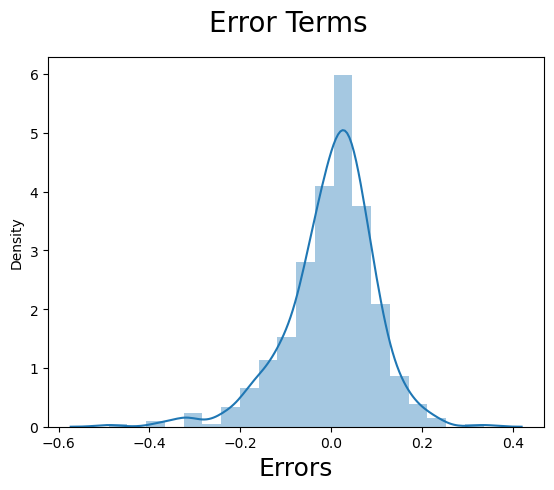

In [47]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### We can see clearly that the error terms are normally distributed with mean equal to 0 which means one of the assumption of multiple linear regression is true

### Making Predictions Using the Final Model
##### Now let us get the predicted values of target variable using the model by passing test data

In [48]:
# Let us first scale the numeric columns of test data set.
numeric_columns_to_scale = ["temp","atemp","hum","windspeed","cnt"]
df_test[numeric_columns_to_scale] = scaler.transform(df_test[numeric_columns_to_scale])
df_test.head()

,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow,Mist
instant,,,,,,,,,,,,,,,,,,,,,
185,1,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
536,0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
300,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
222,0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


##### Separate the y_test from df_test by poping the target variable

In [49]:
y_test = df_test.pop('cnt')
X_test = df_test

##### Drop all the columns that we dropped during model building

In [50]:
X_test_1 = X_test.drop(columns=["atemp","spring","Oct","Jun","Mar","Jul","May","Feb","Dec","Nov","Jan","Light Snow","Mist"])
X_test_1.head()

,holiday,temp,hum,windspeed,summer,winter,2019,Aug,Sep
instant,,,,,,,,,
185,1,0.831783,0.657364,0.084219,0,0,0,0,0
536,0,0.901354,0.610133,0.153728,1,0,1,0,0
300,0,0.511964,0.837699,0.334206,0,1,0,0,0
222,0,0.881625,0.437098,0.339570,0,0,0,1,0
153,0,0.817246,0.314298,0.537414,1,0,0,0,0


##### Add constant to X_test data set and predict the predicted values for test dataset

In [51]:
X_test_1 = sm.add_constant(X_test_1)
y_test_pred = lm1.predict(X_test_1)

### Model Evaluation

##### Now we have the predicted test dataset, let us now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

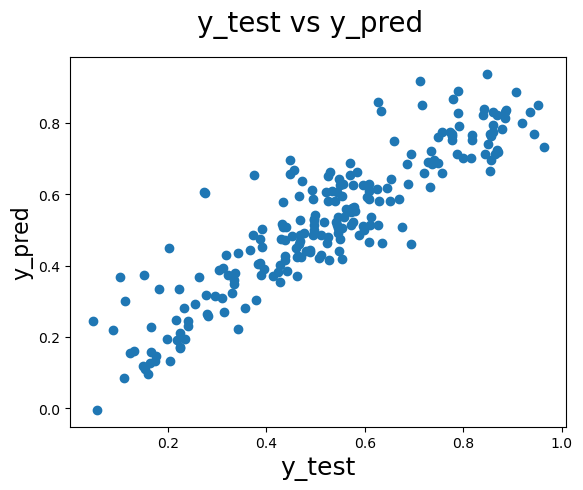

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)      

#### We can see from the scatter plot above that the predicted y values vs actual y values of test data set are having linear regression with each other

In [53]:
r2_score_test = r2_score(y_test, y_test_pred)
print("R2 score for test data is {}".format(r2_score_test))

R2 score for test data is 0.8045038323202889


In [54]:
r2_score_train = r2_score(y_train, y_train_pred)
print("R2 score for train data is {}".format(r2_score_train))

R2 score for train data is 0.8141411559673436


#### We can see that model is accurate as the r2 score for both train and test data set are close to 0.80